<a href="https://colab.research.google.com/github/sujalsin/Risk-Management-Modeling/blob/main/Risk_Management_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Value at Risk (VaR) model**

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# Set the start and end dates and the ticker symbol
start_date = '2020-01-01'
end_date = '2023-07-12'
ticker = 'AAPL'

# Download the data
df = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)

# Calculate daily returns
df['Return'] = df['Adj Close'].pct_change()

# Drop missing values
df = df.dropna()

# Calculate VaR
var_95 = np.percentile(df['Return'], 5)
print('VaR 95% confidence level: ', var_95)

# For 99% confidence level
var_99 = np.percentile(df['Return'], 1)
print('VaR 99% confidence level: ', var_99)

[*********************100%***********************]  1 of 1 completed
VaR 95% confidence level:  -0.03318984219600272
VaR 99% confidence level:  -0.056082220570747465


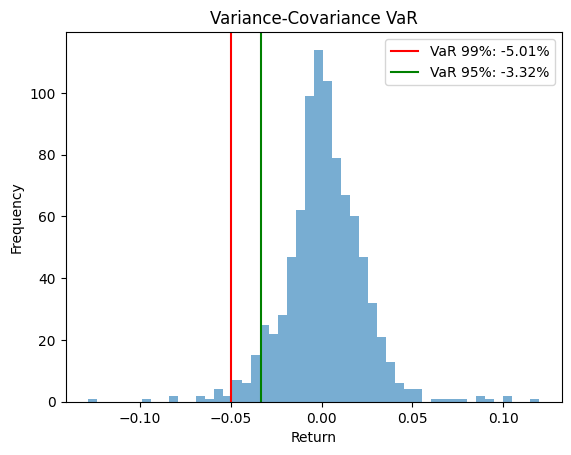

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram of returns
plt.hist(df['Return'], bins=50, alpha=0.6)

# Add a vertical line at the 1% quantile result
plt.axvline(x=var_99, color='r', linestyle='-', label='VaR 99%: {0:.2f}%'.format(var_99*100))
plt.axvline(x=var_95, color='g', linestyle='-', label='VaR 95%: {0:.2f}%'.format(var_95*100))

plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Variance-Covariance VaR')
plt.show()


**Monte Carlo Simulation**

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

# Set the start and end dates and the ticker symbol
start_date = '2020-01-01'
end_date = '2023-07-12'
ticker = 'AAPL'

# Download the data
df = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)

# Calculate daily returns
df['Return'] = df['Adj Close'].pct_change()

# Drop missing values
df = df.dropna()

# Monte Carlo VaR
np.random.seed(42)
sim_returns = []

# Simulate returns 10000 times
for i in range(10000):
    random_sample = df['Return'].sample(252, replace=True)
    sim_returns.append(random_sample.mean())

var_99 = np.percentile(sim_returns, 1)
print('Monte Carlo VaR at 99% confidence: ', var_99)


[*********************100%***********************]  1 of 1 completed
Monte Carlo VaR at 99% confidence:  -0.0019778472650138117


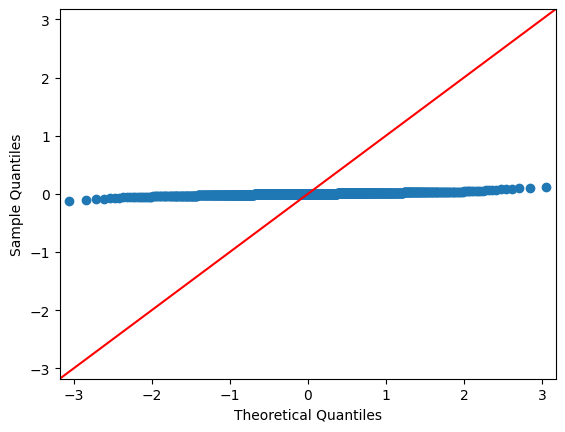

In [ ]:
import statsmodels.api as sm
import pylab as py

# Q-Q plot
sm.qqplot(df['Return'], line='45')
py.show()


**Variance-Covariance VaR**

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import scipy.stats as stats
yf.pdr_override()

# Set the start and end dates and the ticker symbol
start_date = '2020-01-01'
end_date = '2023-07-12'
ticker = 'AAPL'

# Download the data
df = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)

# Calculate daily returns
df['Return'] = df['Adj Close'].pct_change()

# Drop missing values
df = df.dropna()

# Variance-Covariance VaR
mu = np.mean(df['Return'])
sigma = np.std(df['Return'])

# For 99% confidence level
var_99 = stats.norm.ppf(1-0.99, mu, sigma)
print('Variance-Covariance VaR at 99% confidence: ', var_99)


[*********************100%***********************]  1 of 1 completed
Variance-Covariance VaR at 99% confidence:  -0.050063977659831754


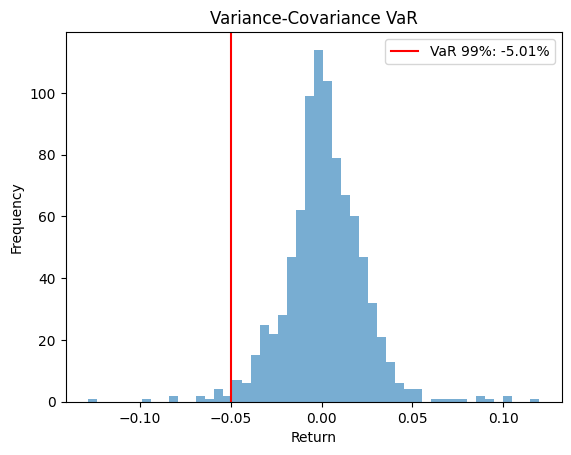

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram of returns
plt.hist(df['Return'], bins=50, alpha=0.6)

# Add a vertical line at the 1% quantile result
plt.axvline(x=var_99, color='r', linestyle='-', label='VaR 99%: {0:.2f}%'.format(var_99*100))

plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Variance-Covariance VaR')
plt.show()
